In [218]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [219]:
dataset_df = pd.read_csv("archive/playground-series-s3e21/sample_submission.csv")

<Axes: xlabel='O2_1', ylabel='target'>

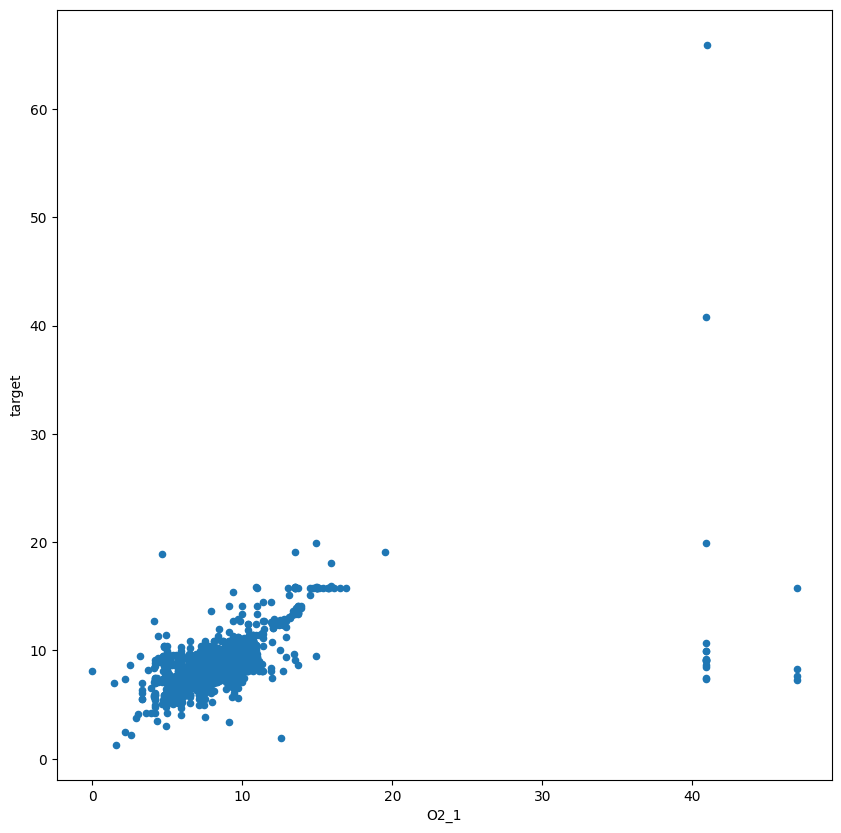

In [220]:
dataset_df.plot(x= "O2_1", y = "target", kind= "scatter")


In [221]:
dataset_df.describe()

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,...,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,1749.500000,8.473834,8.216993,9.291581,9.633064,8.065733,5.671581,9.461363,6.547433,0.340525,...,8.710466,3.002243,3.242654,4.816718,4.754389,4.285660,5.968980,7.837995,3.750349,4.068639
std,1010.507298,1.885712,3.040743,6.817822,1.439039,1.463881,2.721399,1.140365,1.663266,0.284751,...,6.438648,2.918355,2.713923,2.009161,1.547491,2.093388,2.576146,3.724861,1.682421,1.894632
min,0.000000,1.300000,0.000000,0.000000,4.900000,2.300000,0.200000,0.000000,0.000000,0.020000,...,0.044000,0.011000,0.000000,0.570000,0.089000,0.850000,2.025000,2.020000,0.364000,1.600000
25%,874.750000,7.470000,7.100000,7.300000,8.770000,6.830000,4.550000,8.980000,5.877500,0.214500,...,4.450000,1.140000,1.780000,3.520000,3.950000,2.290000,4.950000,5.725000,2.684000,2.900000
50%,1749.500000,8.280000,7.890000,8.300000,9.500000,7.980000,5.800000,9.430000,6.430000,0.247000,...,6.054000,1.730000,1.800000,4.600000,4.800000,3.950000,5.725000,7.500000,3.500000,3.700000
75%,2624.250000,9.110000,9.100000,8.700000,9.545000,9.265000,7.015000,10.070000,7.150000,0.370000,...,14.515000,3.025000,4.237500,5.000000,5.400000,4.725000,6.250000,8.400000,4.150000,4.450000
max,3499.000000,65.930000,46.950000,65.950000,16.900000,21.800000,59.400000,40.190000,15.900000,4.200000,...,35.000000,19.355000,27.025000,11.650000,10.700000,19.800000,55.400000,82.450000,19.375000,10.370000


In [222]:
x = dataset_df.drop(columns =['id','target'])
y = dataset_df["target"]

In [223]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1, random_state = 45)

rf_model = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)
rf_model.fit(x_train, y_train)

print(mean_squared_error(y_test, y_test,squared=False))
print(rf_model.score(x_train,y_train))

0.0
0.7611588464686911


In [224]:
importances = rf_model.feature_importances_
columns = x.columns
i=0

while i <len(columns):
    print (f" The importance of feature '{columns[i]}' is {round(importances[i]*100, 2)}%.")
    i += 1

 The importance of feature 'O2_1' is 49.84%.
 The importance of feature 'O2_2' is 30.43%.
 The importance of feature 'O2_3' is 0.26%.
 The importance of feature 'O2_4' is 0.63%.
 The importance of feature 'O2_5' is 0.45%.
 The importance of feature 'O2_6' is 0.44%.
 The importance of feature 'O2_7' is 0.38%.
 The importance of feature 'NH4_1' is 0.45%.
 The importance of feature 'NH4_2' is 0.49%.
 The importance of feature 'NH4_3' is 0.26%.
 The importance of feature 'NH4_4' is 0.33%.
 The importance of feature 'NH4_5' is 0.39%.
 The importance of feature 'NH4_6' is 0.78%.
 The importance of feature 'NH4_7' is 0.28%.
 The importance of feature 'NO2_1' is 0.38%.
 The importance of feature 'NO2_2' is 0.66%.
 The importance of feature 'NO2_3' is 0.32%.
 The importance of feature 'NO2_4' is 0.2%.
 The importance of feature 'NO2_5' is 0.37%.
 The importance of feature 'NO2_6' is 0.42%.
 The importance of feature 'NO2_7' is 0.29%.
 The importance of feature 'NO3_1' is 0.3%.
 The importance o

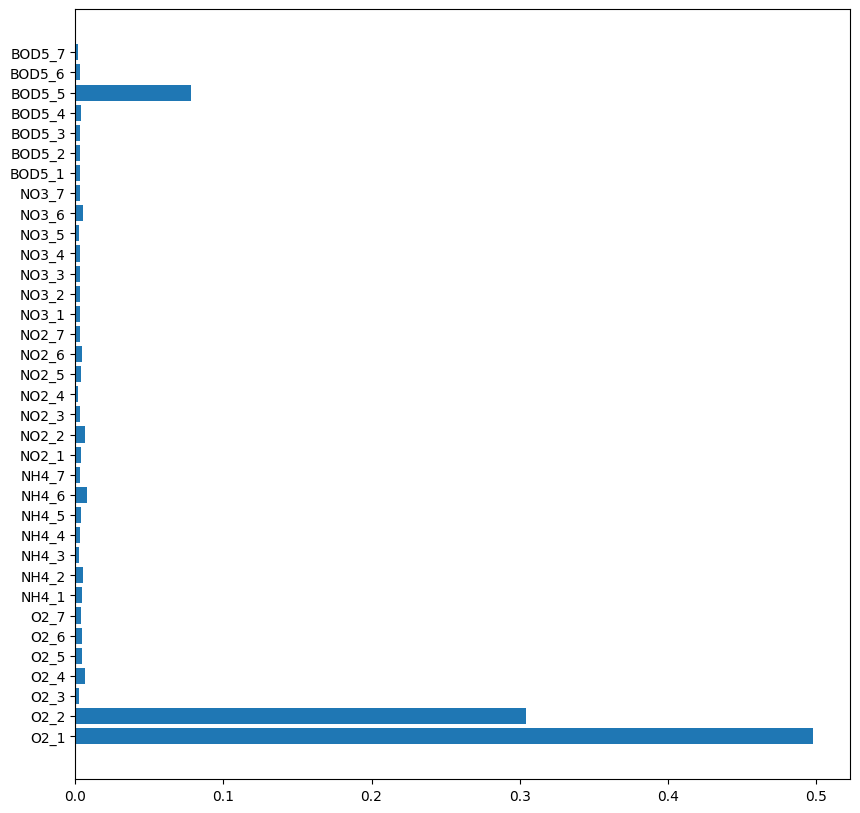

<Figure size 1000x1600 with 0 Axes>

In [225]:
plt.barh(columns, importances) #tranposes the graph
plt.figure(figsize=(10,16))
plt.show()

In [226]:
col_to_keep = ["target","O2_1", "O2_2", "id", "BOD5_5"]

for i in dataset_df.columns:
    if i not in col_to_keep:
        dataset_df[i] = 0

In [227]:
dataset_df.head()

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,7.500,9.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,16.645,0,0
1,1,9.10,13.533,40.90,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5.725,0,0
2,2,8.21,3.710,5.42,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6.750,0,0
3,3,8.39,8.700,8.10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.670,0,0
4,4,8.07,8.050,8.65,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.400,0,0


In [228]:
dataset_df.describe()

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.0,3500.0,3500.0,3500.0,3500.0,3500.0,...,3500.0,3500.0,3500.0,3500.0,3500.0,3500.0,3500.0,3500.000000,3500.0,3500.0
mean,1749.500000,8.473834,8.216993,9.291581,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.837995,0.0,0.0
std,1010.507298,1.885712,3.040743,6.817822,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.724861,0.0,0.0
min,0.000000,1.300000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.020000,0.0,0.0
25%,874.750000,7.470000,7.100000,7.300000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.725000,0.0,0.0
50%,1749.500000,8.280000,7.890000,8.300000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.500000,0.0,0.0
75%,2624.250000,9.110000,9.100000,8.700000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.400000,0.0,0.0
max,3499.000000,65.930000,46.950000,65.950000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.450000,0.0,0.0


In [212]:
dataset_df.to_csv("prediction.csv", index=False)